## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
from statsmodels.stats.outliers_influence import variance_inflation_factor
rcParams['figure.figsize'] = (12,6)
sns.set()
import statistics
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

## Import Dataset

In [2]:
data=pd.read_csv('/Users/Lovely_Ray/Desktop/customer_booking.csv')
#Taking a look at the first 5 rows of the dataset
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## Data Pre-processing

In [3]:
# Checking datatypes of the each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
# the no of columns and rows in the data
data.shape

(50000, 14)

** so we can see that the dataset has 50000 rows and 14 columns

In [5]:
#statistical summary of the dataset for numerical variables
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
#Summary of data for categorical variables
data.describe(include='O')

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


## EDA

In [7]:
##Finding missing values in the dataset
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

** We don't have any missing values in the dataset

In [8]:
# Find Duplicate Values
data.duplicated().sum()

719

In [9]:
##Since duplicate values are there we have to view where the duplicate values are there in the dataset
data[data.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [10]:
#Dropping duplicates
data=data.drop_duplicates()

In [11]:
# checking the shape of the dataset after dropping duplicate values
data.shape

(49281, 14)

### Visualizations of the categorical variables

In [12]:
data['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [13]:
def pie_plot(data,ylabel):
    colors = ['#ADD8E6', '#89CFF0']
    plt.rcParams.update({'text.color' : "black"})
    labels = 'No', 'Yes'
    plt.figure(figsize = (12,5))
    ax = ((data.value_counts()/len(data))*100).plot.pie(labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = colors)
    ax.set_ylabel(ylabel,fontsize = 12)
    ax.axis('equal') 
    return plt.show()

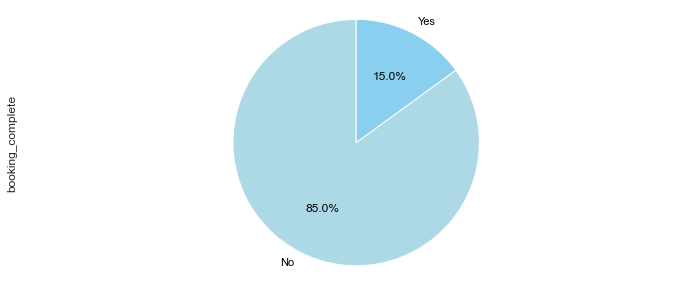

In [14]:
pie_plot(data['booking_complete'],'booking_complete')

*** It clearly indicates that the dataset is highly imbalanced

In [15]:
data['wants_extra_baggage'].value_counts()

1    32931
0    16350
Name: wants_extra_baggage, dtype: int64

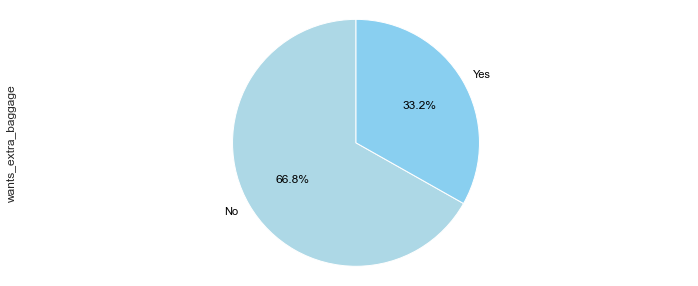

In [16]:
pie_plot(data['wants_extra_baggage'],'wants_extra_baggage')

In [17]:
data['wants_preferred_seat'].value_counts()

0    34712
1    14569
Name: wants_preferred_seat, dtype: int64

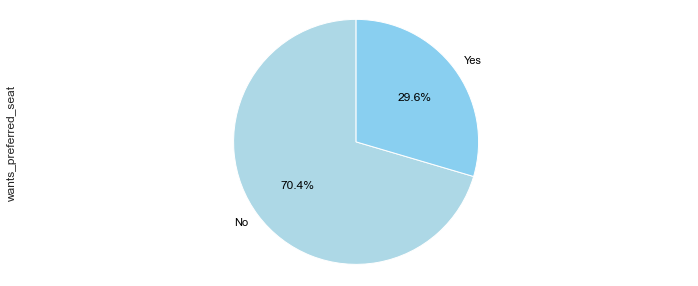

In [18]:
pie_plot(data['wants_preferred_seat'],'wants_preferred_seat')

In [19]:
data['wants_in_flight_meals'].value_counts()

0    28256
1    21025
Name: wants_in_flight_meals, dtype: int64

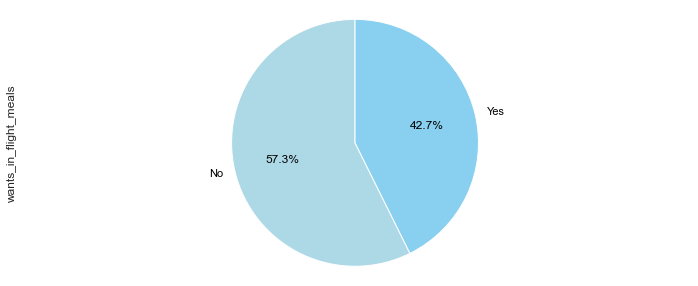

In [20]:
pie_plot(data['wants_in_flight_meals'],'wants_in_flight_meals')

In [21]:
data['sales_channel'].value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

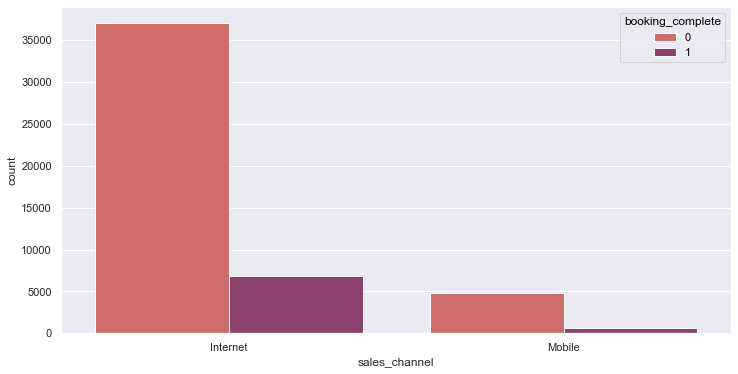

In [22]:
sns.countplot(data=data,x='sales_channel',palette='flare',hue='booking_complete')

In [23]:
data['trip_type'].value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

<AxesSubplot:xlabel='trip_type', ylabel='count'>

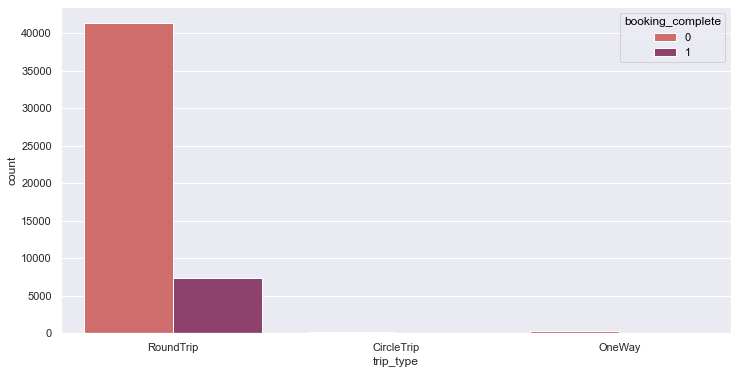

In [24]:
sns.countplot(data=data,x='trip_type',palette='flare',hue='booking_complete')

<AxesSubplot:xlabel='flight_day', ylabel='count'>

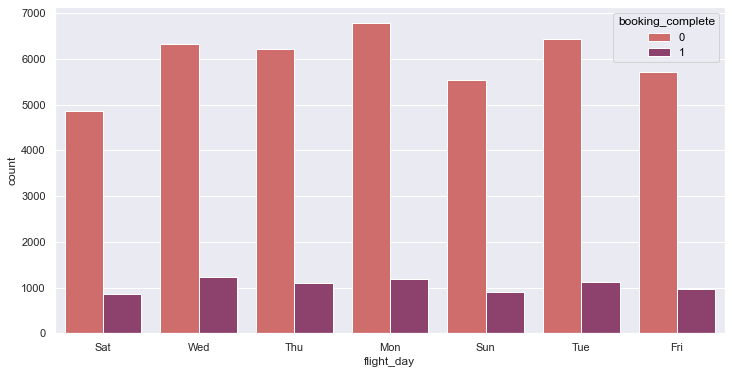

In [25]:
sns.countplot(data=data,x='flight_day',palette='flare',hue='booking_complete')

<AxesSubplot:xlabel='wants_extra_baggage', ylabel='count'>

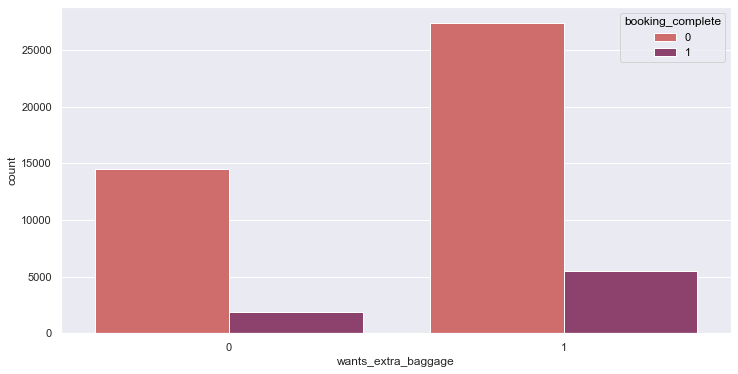

In [26]:
sns.countplot(data=data,x='wants_extra_baggage',palette='flare',hue='booking_complete')

<AxesSubplot:xlabel='wants_preferred_seat', ylabel='count'>

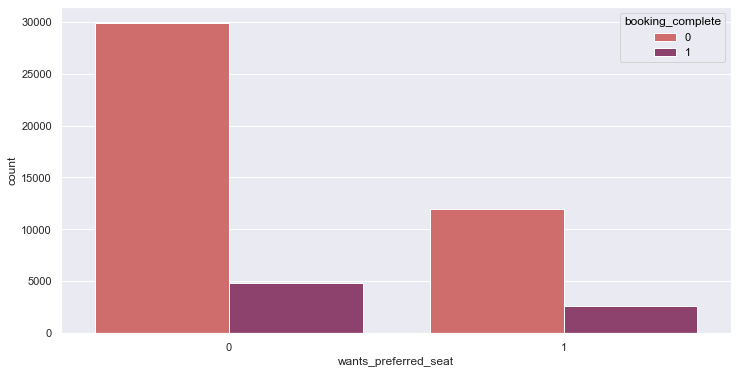

In [27]:
sns.countplot(data=data,x='wants_preferred_seat',palette='flare',hue='booking_complete')

<AxesSubplot:xlabel='wants_in_flight_meals', ylabel='count'>

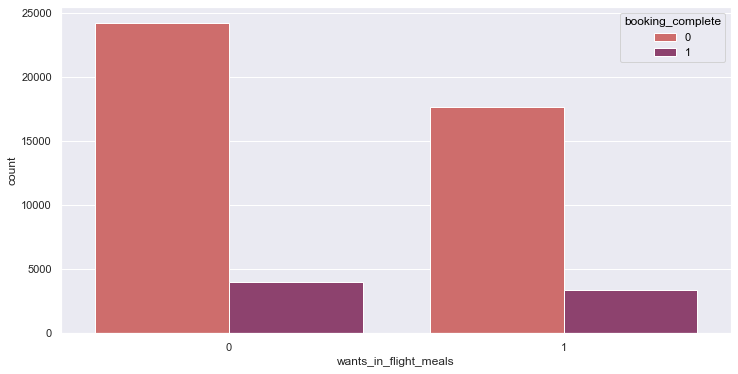

In [28]:
sns.countplot(data=data,x='wants_in_flight_meals',palette='flare',hue='booking_complete')

In [29]:
#Checking total no of unique route
data['route'].nunique()

799

In [30]:
# checking the different route names
data['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [31]:
#Checking total no of unique booking origin
data['booking_origin'].nunique()

104

In [32]:
# checking the different booking origin country names
data['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [33]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### Checking outliers in the data

In [34]:
# Check Outliers
def box_plot(df):
    plt.figure(figsize=(16, 16))
    plt.subplots_adjust(hspace=0.5)
    for i,col in enumerate(df.columns):
        ax = plt.subplot(5, 4, i + 1)
        sns.boxplot(data=data, orient="h",x=col,ax=ax, palette="Set2")
        ax.set_xlabel(col)
    return plt.show()

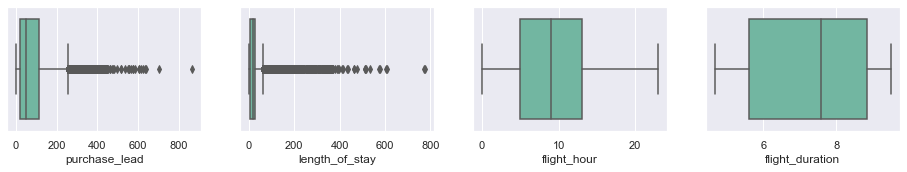

In [35]:
drop_features=['num_passengers', 'sales_channel', 'trip_type',
       'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'booking_complete']
box_plot(data.drop(columns=drop_features))

*** We can see that there are outliers present in columns 'purchase_lead' and 'Length_of_stay'

In [36]:
booking_data = data.copy()
titles =['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']

In [37]:
## checking no of outliers vis-a-vis 'booking_complete'
# Using IQR method
def check_outliers(df):
    result_outliers = []
    result_max_outliers = []
    result_min_outliers = []
    result_outliers_is_exist = []
    result_mean = []
    booking_complete_status = []
    features = df.drop(columns=drop_features).columns
    for i,col in enumerate(features):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[col][((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
        result_outliers_is_exist.append(((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any())
        result_outliers.append(len(outliers))
        booking_complete_status.append(len(df[df.index.isin(outliers.index) & df.booking_complete ==1]["booking_complete"]))
    #         result_max_outliers.append(outliers.max())
    #         result_min_outliers.append(outliers.min())
    #         result_mean.append(df[col].mean())
    data_new = {'Feature':features,'is Exist Outlier':result_outliers_is_exist,'Total Outliers':result_outliers,"Booking Complete":booking_complete_status}
    result_df = pd.DataFrame(data_new)
    return result_df

In [38]:
outliers = check_outliers(booking_data)
outliers

,Feature,is Exist Outlier,Total Outliers,Booking Complete
0,purchase_lead,True,3391,492
1,length_of_stay,True,3748,545
2,flight_hour,False,0,0
3,flight_duration,False,0,0


### Treating outliers by IQR method

In [39]:
percentile25 = booking_data['purchase_lead'].quantile(0.25)
percentile75 = booking_data['purchase_lead'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [40]:
data_cap = booking_data.copy()
data_cap['purchase_lead'] = np.where(
    data_cap['purchase_lead'] > upper_limit,
    upper_limit,
    np.where(
        data_cap['purchase_lead'] < lower_limit,
        lower_limit,
        data_cap['purchase_lead']
    )
)

In [41]:
percentile25 = booking_data['length_of_stay'].quantile(0.25)
percentile75 = booking_data['length_of_stay'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [42]:
data_cap = booking_data.copy()
data_cap['length_of_stay'] = np.where(
    data_cap['length_of_stay'] > upper_limit,
    upper_limit,
    np.where(
        data_cap['length_of_stay'] < lower_limit,
        lower_limit,
        data_cap['length_of_stay']
    )
)

### Visual representations of variables with outliers and variables after treating outliers

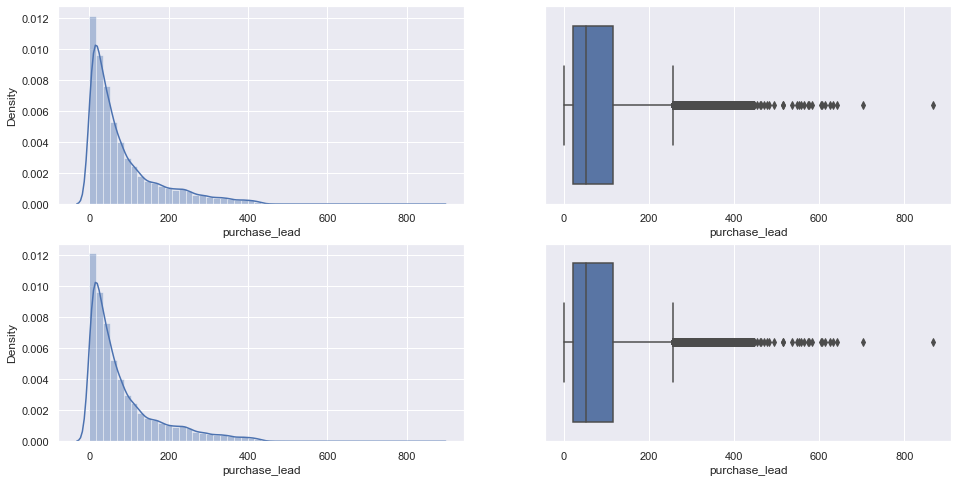

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(booking_data['purchase_lead'])
plt.subplot(2,2,2)
sns.boxplot(booking_data['purchase_lead'])
plt.subplot(2,2,3)
sns.distplot(data_cap['purchase_lead'])
plt.subplot(2,2,4)
sns.boxplot(data_cap['purchase_lead'])
plt.show()

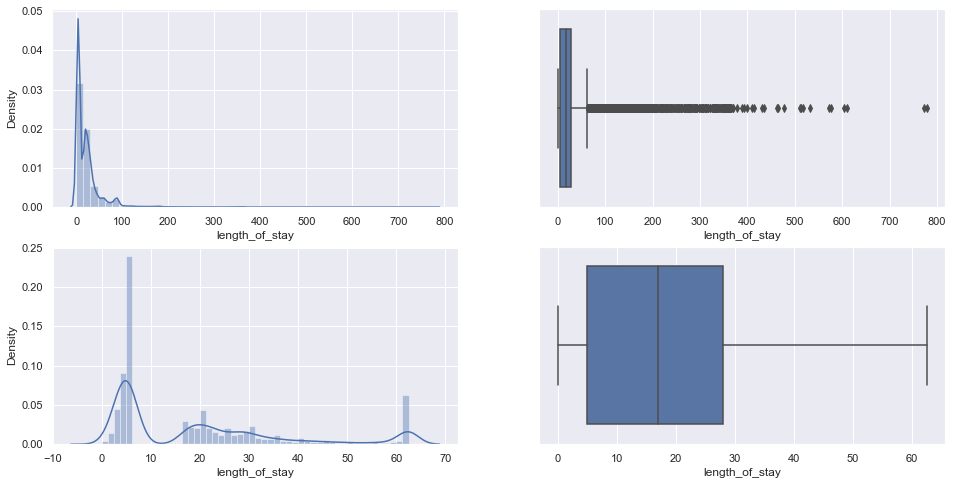

In [44]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(booking_data['length_of_stay'])
plt.subplot(2,2,2)
sns.boxplot(booking_data['length_of_stay'])
plt.subplot(2,2,3)
sns.distplot(data_cap['length_of_stay'])
plt.subplot(2,2,4)
sns.boxplot(data_cap['length_of_stay'])
plt.show()

### # Checking correlations among the variables

In [45]:
data.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,-0.010911,0.012251,0.011953,-0.003236,0.006705
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,1.000000,0.208392,0.216835,0.057637,0.068452
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.208392,1.000000,0.315162,0.100652,0.050189
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,0.068452,0.050189,0.026399,-0.106529,1.000000


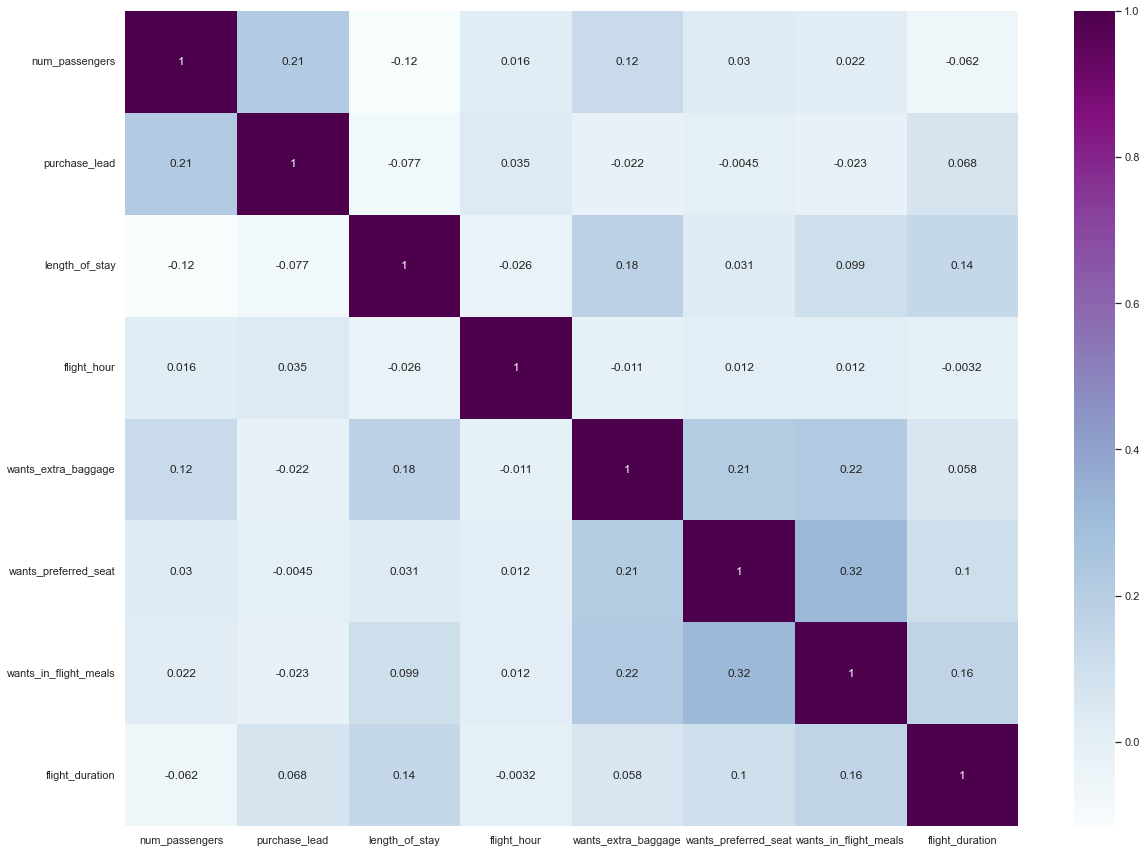

In [46]:
#Heatmap
plt.figure(figsize=(20,15))
sns.set(style="white")
sns.heatmap(data.drop(columns=["booking_complete"]).corr(),annot=True,cmap="BuPu" )
plt.show()

Most Positive Correlations: 
 wants_extra_baggage      0.068452
wants_preferred_seat     0.050189
wants_in_flight_meals    0.026399
num_passengers           0.024092
flight_hour              0.006705
dtype: float64

Most Negative Correlations: 
 purchase_lead     -0.022132
length_of_stay    -0.072377
flight_duration   -0.106529
dtype: float64


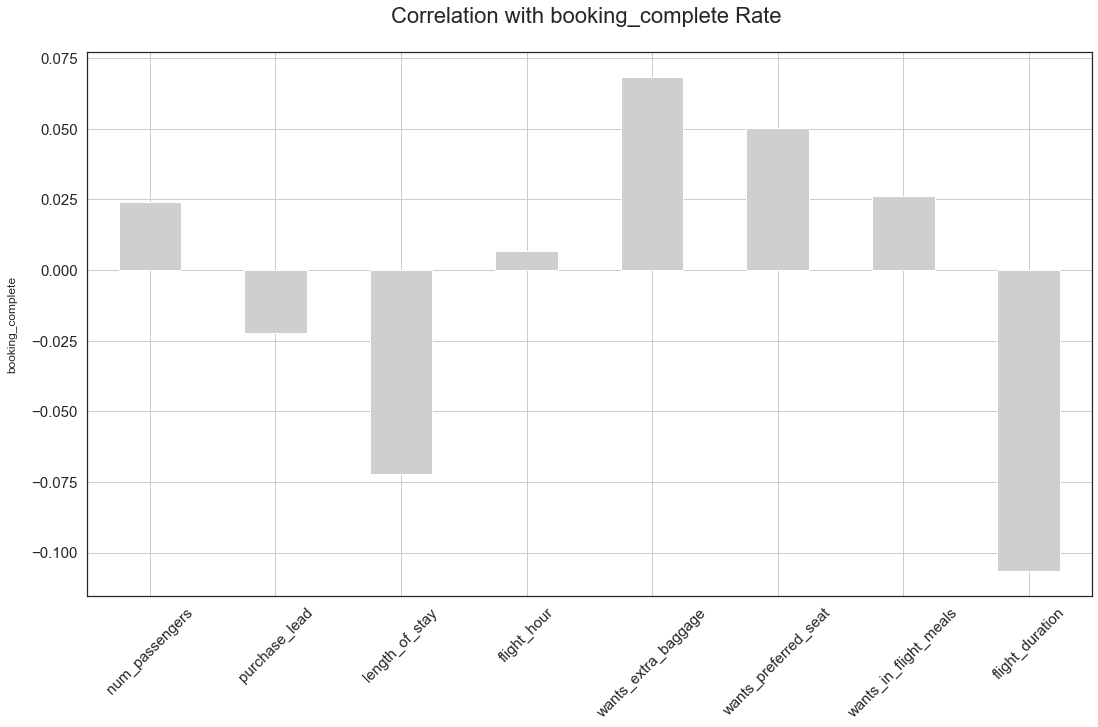

In [47]:
# Find Positive/Negative Correlations
correlations = data_cap.corrwith(data.booking_complete)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#D0CFCF',
        rot = 45, grid = True)
plt.ylabel("booking_complete", labelpad=14)
plt.title('Correlation with booking_complete Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
print('Most Positive Correlations: \n', positive_correlations.sort_values(ascending=False))
print('\nMost Negative Correlations: \n', negative_correlations.sort_values(ascending=False))

### Encoding categorical variables

In [48]:
data_cap.replace({'sales_channel':{'Internet':0,'Mobile':1}},inplace=True)
data_cap.replace({'flight_day':{'Sun':0,'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6}},inplace=True)

In [49]:
data_cap = pd.get_dummies(data=data_cap, columns=['trip_type'])
data_cap

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,0,262,19.0,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,0,112,20.0,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,0,243,22.0,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,0,96,31.0,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,0,68,22.0,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,27,6.0,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,0,111,6.0,4,0,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,0,24,6.0,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,0,15,6.0,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


In [50]:
#Dropping unnecessary columns
data_cap.drop(['route', 'booking_origin'], inplace=True, axis=1)

In [51]:
df=data_cap.copy()
df

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,0,262,19.0,7,6,1,0,0,5.52,0,0,0,1
1,1,0,112,20.0,3,6,0,0,0,5.52,0,0,0,1
2,2,0,243,22.0,17,3,1,1,0,5.52,0,0,0,1
3,1,0,96,31.0,4,6,0,0,1,5.52,0,0,0,1
4,2,0,68,22.0,15,3,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,27,6.0,9,6,1,0,1,5.62,0,0,0,1
49996,1,0,111,6.0,4,0,0,0,0,5.62,0,0,0,1
49997,1,0,24,6.0,22,6,0,0,1,5.62,0,0,0,1
49998,1,0,15,6.0,11,1,1,0,1,5.62,0,0,0,1


In [52]:
df.shape

(49281, 14)

## Standardizing the data

In [53]:
#splitting the dataset into independant variables and target variable
X=df.drop('booking_complete', axis=1)
y=df['booking_complete']

In [54]:
#Standardizing the features using Standardscaler to bring features on a similar scale. 
sc = StandardScaler()
X=sc.fit_transform(X)

In [55]:
#Checking the shape of data
X.shape, y.shape

((49281, 13), (49281,))

In [56]:
X

array([[ 0.40315017, -0.34948461,  1.96082368, ..., -0.04857368,
        -0.08885082,  0.10144611],
       [-0.58059134, -0.34948461,  0.30170254, ..., -0.04857368,
        -0.08885082,  0.10144611],
       [ 0.40315017, -0.34948461,  1.75066833, ..., -0.04857368,
        -0.08885082,  0.10144611],
       ...,
       [-0.58059134, -0.34948461, -0.67164852, ..., -0.04857368,
        -0.08885082,  0.10144611],
       [-0.58059134, -0.34948461, -0.77119579, ..., -0.04857368,
        -0.08885082,  0.10144611],
       [-0.58059134, -0.34948461, -0.72695256, ..., -0.04857368,
        -0.08885082,  0.10144611]])

## Splitting the data into training and testing

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)

In [58]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(39424, 13) (9857, 13) (39424,) (9857,)


## Model Building

### classification model building with imbalanced dataset with all the parameters

In [59]:
#Model building
LR = LogisticRegression(random_state=0)
Rf= RandomForestClassifier(n_estimators=100, random_state=0)
XGBM = XGBClassifier(random_state=0)

In [60]:
#Model Training
LR.fit(X_train, y_train)
Rf.fit(X_train, y_train)
XGBM.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [61]:
KNN=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
#Logstic Regression model testing
y_pred_LR = LR.predict(X_test)
LR_accuracy = round(accuracy_score(y_test, y_pred_LR),2)
print(classification_report(y_test, y_pred_LR )) 
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_LR)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      8296
           1       0.00      0.00      0.00      1561

    accuracy                           0.84      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.71      0.84      0.77      9857

Logistic Regression accuracy score with all the features: 0.8416


In [63]:
#Random Forest model testing
y_pred_Rf = Rf.predict(X_test)
Rf_accuracy = round(accuracy_score(y_test, y_pred_Rf),2)
print(classification_report(y_test, y_pred_Rf )) 
print('Random Forest accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_Rf)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      8296
           1       0.34      0.04      0.07      1561

    accuracy                           0.84      9857
   macro avg       0.59      0.51      0.49      9857
weighted avg       0.76      0.84      0.78      9857

Random Forest accuracy score with all the features: 0.8360


In [64]:
#XGBoost model testing
y_pred_XGBM = XGBM.predict(X_test)
XGBM_accuracy = round(accuracy_score(y_test, y_pred_XGBM),2)
print(classification_report(y_test, y_pred_XGBM )) 
print('XGBoost accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_XGBM)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      8296
           1       0.41      0.04      0.07      1561

    accuracy                           0.84      9857
   macro avg       0.63      0.51      0.49      9857
weighted avg       0.78      0.84      0.78      9857

XGBoost accuracy score with all the features: 0.8391


In [65]:
#KNN model testing
y_pred_KNN = KNN.predict(X_test)
KNN_accuracy = round(accuracy_score(y_test, y_pred_KNN),2)
print(classification_report(y_test, y_pred_KNN )) 
print('KNN accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_KNN)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8296
           1       0.26      0.07      0.11      1561

    accuracy                           0.82      9857
   macro avg       0.55      0.52      0.50      9857
weighted avg       0.75      0.82      0.78      9857

KNN accuracy score with all the features: 0.8213


*** So we can see all the models performed poorly in the minority class(1) prediction.

*** hence we will apply SMOTE and check model performance on the SMOTE data

### classification model building with SMOTE 

In [66]:
#Applying Smote
SM=SMOTE(random_state=0)

In [67]:
#resampling the dataset using Smote
X_sm, y_sm = SM.fit_resample(X, y)

In [68]:
#checking target variable shape after SMOTE
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(y_sm))

Before SMOTE : Counter({0: 41890, 1: 7391})
After SMOTE : Counter({0: 41890, 1: 41890})


In [69]:
#Splitting Smote dataset into training and testing dataset
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, random_state=2, test_size=0.2)

In [70]:
#Checking the shape of features
X_train_sm.shape, X_test_sm.shape

((67024, 13), (16756, 13))

In [71]:
#Model Building
LR_sm = LogisticRegression(random_state=0)
Rf_sm= RandomForestClassifier(n_estimators=100, random_state=0,criterion='gini')
XGBM_sm = XGBClassifier(random_state=0)
KNN_sm=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [72]:
#Model Training
LR_sm.fit(X_train_sm, y_train_sm)
Rf_sm.fit(X_train_sm, y_train_sm)
XGBM_sm.fit(X_train_sm, y_train_sm)
KNN_sm.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [73]:
#Logstic Regression model testing on SMOTE data
y_pred_LR_sm = LR_sm.predict(X_test_sm)
LR_sm_accuracy = round(accuracy_score(y_test_sm, y_pred_LR_sm),2)
print(classification_report(y_test_sm, y_pred_LR_sm )) 
print('Logistic Regression accuracy score on SMOTE data with all the features: {0:0.4f}'. format(accuracy_score(y_test_sm, y_pred_LR_sm)))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61      8403
           1       0.60      0.61      0.61      8353

    accuracy                           0.61     16756
   macro avg       0.61      0.61      0.61     16756
weighted avg       0.61      0.61      0.61     16756

Logistic Regression accuracy score on SMOTE data with all the features: 0.6071


In [74]:
#Random Forest model testing on SMOTE data
y_pred_Rf_sm = Rf_sm.predict(X_test_sm)
Rf_sm_accuracy = round(accuracy_score(y_test_sm, y_pred_Rf_sm),2)
print(classification_report(y_test_sm, y_pred_Rf_sm )) 
print('Random Forest accuracy score on SMOTE data with all the features: {0:0.4f}'. format(accuracy_score(y_test_sm, y_pred_Rf_sm)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      8403
           1       0.94      0.86      0.90      8353

    accuracy                           0.90     16756
   macro avg       0.91      0.90      0.90     16756
weighted avg       0.91      0.90      0.90     16756

Random Forest accuracy score on SMOTE data with all the features: 0.9044


In [75]:
#XGBoost model testing on SMOTE data
y_pred_XGBM_sm = XGBM_sm.predict(X_test_sm)
XGBM_sm_accuracy = round(accuracy_score(y_test_sm, y_pred_XGBM_sm),2)
print(classification_report(y_test_sm, y_pred_XGBM_sm )) 
print('XGBoost accuracy score on SMOTE data with all the features: {0:0.4f}'. format(accuracy_score(y_test_sm, y_pred_XGBM_sm)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      8403
           1       0.99      0.82      0.89      8353

    accuracy                           0.90     16756
   macro avg       0.92      0.90      0.90     16756
weighted avg       0.92      0.90      0.90     16756

XGBoost accuracy score on SMOTE data with all the features: 0.9041


In [76]:
#KNN model testing on SMOTE data
y_pred_KNN_sm = KNN_sm.predict(X_test_sm)
KNN_sm_accuracy = round(accuracy_score(y_test_sm, y_pred_KNN_sm),2)
print(classification_report(y_test_sm, y_pred_KNN_sm )) 
print('KNN accuracy score on SMOTE data with all the features: {0:0.4f}'. format(accuracy_score(y_test_sm, y_pred_KNN_sm)))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      8403
           1       0.72      0.93      0.82      8353

    accuracy                           0.79     16756
   macro avg       0.82      0.79      0.79     16756
weighted avg       0.82      0.79      0.79     16756

KNN accuracy score on SMOTE data with all the features: 0.7904


*** The precision and recall have improved for the minority class both in RandomForest and XGBoost model

## Feature Engineering

### RFE Method

In [77]:
#Making a copy of the original imbalanced Data
df1=df.copy()
df1.drop('booking_complete', axis=1, inplace=True)
X_column = df1.columns
X_column.shape

(13,)

In [78]:
#Making a dataframe for variables & target column with imbalanced data
df2 = pd.DataFrame(X, columns=X_column)
df2['booking_complete'] = y
df2.shape

(49281, 14)

In [79]:
#Making a dataframe for variables & target column with SMOTE data
df3 = pd.DataFrame(X_sm, columns=X_column)
df3['booking_complete'] = y_sm
df3.shape

(83780, 14)

In [80]:
#Drawing Important features from Random Forest model using RFE 
rfe_Rf  = RFE(Rf_sm, n_features_to_select=None) 

In [81]:
rfe_Rf.fit(X_sm, y_sm)

RFE(estimator=RandomForestClassifier(random_state=0))

In [82]:
#Important features as per Random Forest model
rfe_Rf.get_feature_names_out(input_features=(df2.columns[:-1]))

array(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'flight_duration'], dtype=object)

In [83]:
#Drawing Important features from XGBoost model using RFE 
rfe_XGBM  = RFE(XGBM_sm, n_features_to_select=None) 

In [84]:
rfe_XGBM.fit(X_sm, y_sm)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=None, num_parallel_tree=None, predictor=None,
                            random_state=0, ...))

In [85]:
#Important features as per XGBoost model
rfe_XGBM.get_feature_names_out(input_features=(df2.columns[:-1]))

array(['length_of_stay', 'flight_hour', 'flight_day',
       'wants_extra_baggage', 'flight_duration', 'trip_type_RoundTrip'],
      dtype=object)

In [86]:
#Comparing all the features from the above 2 models in a DataFrame
rfe_df = pd.DataFrame({'Random Forest' : rfe_Rf.get_feature_names_out(input_features=(df2.columns[:-1])),
                       'XGBoost' : rfe_XGBM.get_feature_names_out(input_features=(df2.columns[:-1]))})
rfe_df

,Random Forest,XGBoost
0,num_passengers,length_of_stay
1,purchase_lead,flight_hour
2,length_of_stay,flight_day
3,flight_hour,wants_extra_baggage
4,flight_day,flight_duration
5,flight_duration,trip_type_RoundTrip


*** From the above we observe that 'length_of_stay','flight_hour','flight_day','flight_duration' are the common features for both RandomForest and XGBoost model.

** So for final model building we will consider the above 4 common features of the 2 models and 4 extra features viz. 'num_passengers', 'purchase_lead','wants_extra_baggage' and 'trip_type_RoundTrip'.

## Final model building on 8 important features and SMOTE resampled data

In [87]:
#Preparing 2 separate dataframe for training & testing
df_train = pd.DataFrame(data = X_train_sm, columns = X_column)
df_test = pd.DataFrame(data = X_test_sm, columns = X_column)

In [88]:
df_train.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2.370633,-0.349485,-0.441085,-0.820059,0.116464,-0.311579,0.704622,-0.647851,1.159277,1.035854,-0.048574,-0.088851,0.101446
1,-0.580591,-0.349485,-0.572101,2.354547,-0.197796,-0.466880,-1.419200,1.543565,-0.862606,0.868784,-0.048574,-0.088851,0.101446
2,1.386892,-0.349485,-0.337854,-0.825144,0.499089,-0.466880,0.704622,-0.647851,-0.862606,-1.630658,-0.048574,-0.088851,0.101446
3,-0.580591,2.861356,0.832621,0.088899,0.541160,1.611417,-1.419200,1.543565,-0.862606,-1.109330,-0.048574,-0.088851,0.101446
4,-0.580591,2.861356,-0.900566,0.795369,-1.009276,0.414468,-1.419200,-0.647851,1.159277,-0.634850,-0.048574,-0.088851,0.101446


In [89]:
df_test.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,-0.580591,-0.349485,-0.196034,-0.784603,1.095377,1.611417,0.704622,-0.647851,-0.862606,-1.109330,-0.048574,-0.088851,0.101446
1,0.403150,-0.349485,-0.245941,-0.730009,-1.248153,-0.986454,0.704622,1.543565,-0.862606,-0.441048,-0.048574,-0.088851,0.101446
2,0.403150,-0.349485,-0.173912,0.252681,-0.567273,-1.506028,0.704622,1.543565,-0.862606,-1.109330,-0.048574,-0.088851,0.101446
3,-0.580591,-0.349485,-0.627405,-0.129476,2.573288,1.091843,0.704622,-0.647851,-0.862606,1.035854,-0.048574,-0.088851,0.101446
4,-0.580591,-0.349485,-0.845331,-0.161958,0.267453,0.572269,-1.419200,1.543565,1.159277,0.193819,-0.048574,-0.088851,0.101446


In [90]:
#Selecting 8 important features for training
X_train_final= df_train.loc[:, ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'flight_duration', 'wants_extra_baggage','trip_type_RoundTrip']]

In [91]:
#Selecting 8 important features for testing
X_test_final = df_test.loc[:, ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'flight_duration', 'wants_extra_baggage','trip_type_RoundTrip']]

In [92]:
#shape of train data
X_train_final.shape, y_train_sm.shape

((67024, 8), (67024,))

In [102]:
X_train_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,wants_extra_baggage,trip_type_RoundTrip
0,2.370633,-0.441085,-0.820059,0.116464,-0.311579,1.035854,0.704622,0.101446
1,-0.580591,-0.572101,2.354547,-0.197796,-0.466880,0.868784,-1.419200,0.101446
2,1.386892,-0.337854,-0.825144,0.499089,-0.466880,-1.630658,0.704622,0.101446
3,-0.580591,0.832621,0.088899,0.541160,1.611417,-1.109330,-1.419200,0.101446
4,-0.580591,-0.900566,0.795369,-1.009276,0.414468,-0.634850,-1.419200,0.101446
...,...,...,...,...,...,...,...,...
67019,0.790425,-0.081325,-0.872299,0.983365,1.611417,-0.339692,0.704622,0.101446
67020,0.403150,0.124730,-0.839197,0.171682,-1.506028,0.868784,0.704622,0.101446
67021,-0.580591,-0.660588,-0.839197,2.388550,-0.466880,-0.187101,0.704622,0.101446
67022,0.403150,-0.273459,-0.730009,0.910638,-0.466880,-0.441048,-1.419200,0.101446


In [93]:
#shape of test data
X_test_final.shape, y_test_sm.shape

((16756, 8), (16756,))

In [94]:
#model building
Rf_final  = RandomForestClassifier(n_estimators=100, random_state=0,criterion='gini')
XGBM_final = XGBClassifier(random_state=0)

In [95]:
#model training
Rf_final.fit(X_train_final, y_train_sm)
XGBM_final.fit(X_train_final, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [96]:
#Random Forest model testing on final data
y_pred_Rf_final = Rf_final.predict(X_test_final)
Rf_final_accuracy = round(accuracy_score(y_test_sm, y_pred_Rf_final),2)
print(classification_report(y_test_sm, y_pred_Rf_final )) 
print('Random Forest accuracy score on final data with selected the features: {0:0.4f}'. format(accuracy_score(y_test_sm, y_pred_Rf_final)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8403
           1       0.93      0.84      0.88      8353

    accuracy                           0.89     16756
   macro avg       0.89      0.89      0.89     16756
weighted avg       0.89      0.89      0.89     16756

Random Forest accuracy score on final data with selected the features: 0.8904


In [97]:
#Cross Validation on RandomForest model
score_Rf=cross_val_score(RandomForestClassifier(), X_sm, y_sm,cv=5)
RF_score_kv= round(np.average(score_Rf),2)
for i,val in enumerate(score_Rf):
    print('Accuracy of %d sample is = %f'%(i+1,val*100))
print("Avg :",np.average(score_Rf))

Accuracy of 1 sample is = 64.209835
Accuracy of 2 sample is = 91.012175
Accuracy of 3 sample is = 84.883027
Accuracy of 4 sample is = 62.783481
Accuracy of 5 sample is = 59.853187
Avg : 0.725483408928145


<AxesSubplot:>

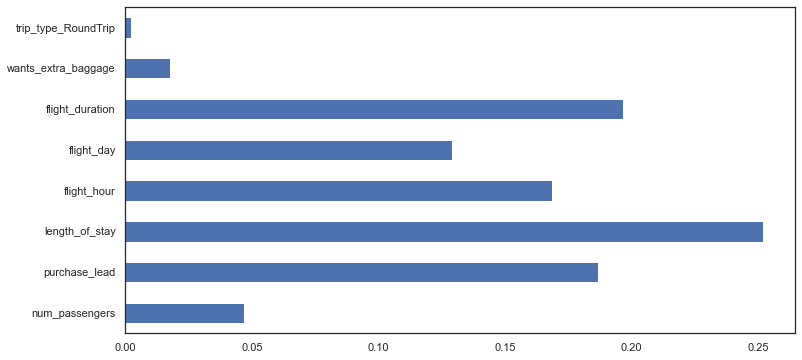

In [103]:
feat_importances_XGBM = pd.Series(Rf_final.feature_importances_, index=X_train_final.columns)
feat_importances.plot(kind='barh')

In [98]:
#XGBoost model testing on final data
y_pred_XGBM_final = XGBM_final.predict(X_test_final)
XGBM_final_accuracy = round(accuracy_score(y_test_sm, y_pred_XGBM_final),2)
print(classification_report(y_test_sm, y_pred_XGBM_final )) 
print('XGBoost accuracy score on final data with selected the features: {0:0.4f}'. format(accuracy_score(y_test_sm, y_pred_XGBM_final)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      8403
           1       0.99      0.82      0.90      8353

    accuracy                           0.91     16756
   macro avg       0.92      0.91      0.91     16756
weighted avg       0.92      0.91      0.91     16756

XGBoost accuracy score on final data with selected the features: 0.9061


In [99]:
#Cross Validation on XGBoost
score_XGBM=cross_val_score(XGBClassifier(), X_sm, y_sm,cv=5)
XGBM_score_kv= round(np.average(score_XGBM),2)
for i,val in enumerate(score_XGBM):
    print('Accuracy of %d sample is = %f'%(i+1,val*100))
print("Avg :",np.average(score_XGBM))

Accuracy of 1 sample is = 55.824779
Accuracy of 2 sample is = 94.067797
Accuracy of 3 sample is = 86.291478
Accuracy of 4 sample is = 66.758176
Accuracy of 5 sample is = 62.001671
Avg : 0.7298878013845786


<AxesSubplot:>

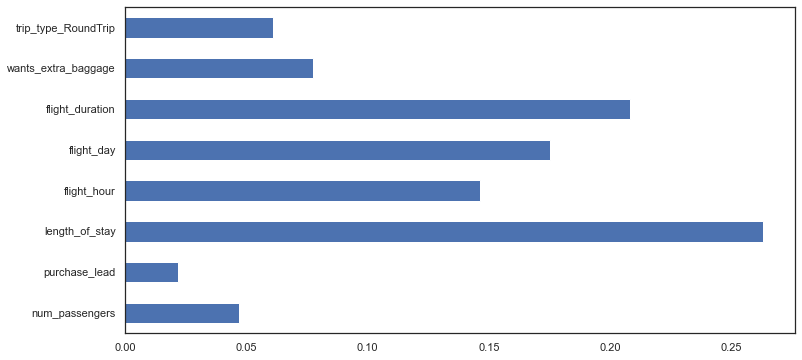

In [104]:
feat_importances = pd.Series(XGBM_final.feature_importances_, index=X_train_final.columns)
feat_importances.plot(kind='barh')

*** So we can see that XGBoost model is giving accuracy of 91% compared to RandomForest's 89%, recall and F1 score is also better compared to RandomForest. so we are choosing XGBoost as our final model.